In [1]:
# -*- coding: utf-8 -*-
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
pd.options.display.max_columns = 999

In [2]:
from matplotlib.font_manager import FontProperties
font = FontProperties(fname=r"c:\windows\fonts\SimSun.ttc", size=14)

In [3]:
epos = pd.read_excel(r'C:\Users\ren.x.1\Desktop\JD_Pricing\ePOS\2017JFMJDepos\PG\PCC.xlsx',encoding='gbk',converters={'ProductCode': str})
epos.shape

(13413, 26)

In [4]:
epos_1 = epos[['Date','ProductCode','Order_Num']]
epos_1 = epos_1[epos_1.Order_Num !=0]
epos_1.head()

,Date,ProductCode,Order_Num
0,2017-01-01,206886,12
1,2017-01-01,845287,8
2,2017-01-01,1280166,4
3,2017-01-01,845278,70
4,2017-01-01,1436742,1


In [5]:
epos_1.shape

(13340, 3)

In [6]:
db = pd.read_excel(r'C:\Users\ren.x.1\Desktop\JD_Pricing\JD\JFM_PCC_ePOS.xlsx',encoding='gbk',converters={'ProductCode': str})
db.shape

(12999, 16)

In [7]:
df = db.copy()

In [8]:
df.head()

,Date,ProductCode,ProductName,销售数量,销售金额,供价,总成本,FM,FM%,Mechanism,SRP,SPP High,SPP Low,UV,销售金额.1,Note
0,2017-01-01,1783785,【京东超市】玉兰油 OLAY 水嫩清爽沐浴露1L配亮爽珍珠沐浴露300ml,6.0,299.40,39.84,239.04,60.36,0.201603,TPR,49.9,36.0,34.0,66.0,299.40,NaN
1,2017-01-01,753265,【京东超市】玉兰油沐浴露深润滋养型1L（沐浴液 沐浴乳 新老包装随机发货）,17.0,946.50,39.84,677.28,269.22,0.284437,其他满减,49.9,32.8,29.8,398.0,946.50,NaN
2,2017-01-01,753268,【京东超市】玉兰油莹亮滋养沐浴乳720毫升（新老包装随机发货）（沐浴露）,1.0,32.39,31.86,31.86,0.53,0.016363,其他满减,39.9,26.0,23.8,21.0,32.39,NaN
3,2017-01-01,753278,【京东超市】玉兰油柔肤滋润沐浴乳720毫升（新老包装随机发货）（沐浴露）,4.0,156.28,31.86,127.44,28.84,0.184541,其他满减,39.9,26.0,23.8,29.0,156.28,NaN
4,2017-01-01,753280,【京东超市】玉兰油亮爽珍珠沐浴露400毫升（新旧包装转换，随机发货）,1.0,27.90,19.87,19.87,8.03,0.287814,其他满减,24.9,17.0,15.5,17.0,27.90,NaN


In [9]:
# exclude coupon
df = df[df.Note.isnull()]
df.drop(['Note'],axis = 1,inplace = True)

In [10]:
df.shape

(11916, 15)

In [11]:
df.head()

,Date,ProductCode,ProductName,销售数量,销售金额,供价,总成本,FM,FM%,Mechanism,SRP,SPP High,SPP Low,UV,销售金额.1
0,2017-01-01,1783785,【京东超市】玉兰油 OLAY 水嫩清爽沐浴露1L配亮爽珍珠沐浴露300ml,6.0,299.40,39.84,239.04,60.36,0.201603,TPR,49.9,36.0,34.0,66.0,299.40
1,2017-01-01,753265,【京东超市】玉兰油沐浴露深润滋养型1L（沐浴液 沐浴乳 新老包装随机发货）,17.0,946.50,39.84,677.28,269.22,0.284437,其他满减,49.9,32.8,29.8,398.0,946.50
2,2017-01-01,753268,【京东超市】玉兰油莹亮滋养沐浴乳720毫升（新老包装随机发货）（沐浴露）,1.0,32.39,31.86,31.86,0.53,0.016363,其他满减,39.9,26.0,23.8,21.0,32.39
3,2017-01-01,753278,【京东超市】玉兰油柔肤滋润沐浴乳720毫升（新老包装随机发货）（沐浴露）,4.0,156.28,31.86,127.44,28.84,0.184541,其他满减,39.9,26.0,23.8,29.0,156.28
4,2017-01-01,753280,【京东超市】玉兰油亮爽珍珠沐浴露400毫升（新旧包装转换，随机发货）,1.0,27.90,19.87,19.87,8.03,0.287814,其他满减,24.9,17.0,15.5,17.0,27.90


In [12]:
df['Sales_Price'] = np.round(df[u'销售金额']/df[u'销售数量'],decimals = 2)

In [13]:
df_1 = pd.merge(df,epos_1, on = ['Date','ProductCode'], how='left')

In [14]:
df_1.shape

(11916, 17)

In [15]:
df_2 = df_1[['Date','ProductCode','ProductName',u'销售数量','Mechanism','Sales_Price','Order_Num','UV']]
df_2[df_2.Order_Num.isnull()]
df_2.Order_Num.isnull().value_counts()

False    11590
True       326
Name: Order_Num, dtype: int64

In [16]:
df_2.dropna(inplace = True)

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [17]:
df_2.head()

,Date,ProductCode,ProductName,销售数量,Mechanism,Sales_Price,Order_Num,UV
0,2017-01-01,1783785,【京东超市】玉兰油 OLAY 水嫩清爽沐浴露1L配亮爽珍珠沐浴露300ml,6.0,TPR,49.90,6.0,66.0
1,2017-01-01,753265,【京东超市】玉兰油沐浴露深润滋养型1L（沐浴液 沐浴乳 新老包装随机发货）,17.0,其他满减,55.68,16.0,398.0
2,2017-01-01,753268,【京东超市】玉兰油莹亮滋养沐浴乳720毫升（新老包装随机发货）（沐浴露）,1.0,其他满减,32.39,1.0,21.0
3,2017-01-01,753278,【京东超市】玉兰油柔肤滋润沐浴乳720毫升（新老包装随机发货）（沐浴露）,4.0,其他满减,39.07,4.0,29.0
4,2017-01-01,753280,【京东超市】玉兰油亮爽珍珠沐浴露400毫升（新旧包装转换，随机发货）,1.0,其他满减,27.90,1.0,17.0


In [18]:
df_2.shape

(11590, 8)

In [19]:
df_2['num_per_order'] = df_2[u'销售数量']/df_2['Order_Num']

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [20]:
df_3 = df_2[df_2.num_per_order < 10]
df_3 = df_3[df_3.UV != 0]

In [21]:
df_3.head()

,Date,ProductCode,ProductName,销售数量,Mechanism,Sales_Price,Order_Num,UV,num_per_order
0,2017-01-01,1783785,【京东超市】玉兰油 OLAY 水嫩清爽沐浴露1L配亮爽珍珠沐浴露300ml,6.0,TPR,49.90,6.0,66.0,1.0000
1,2017-01-01,753265,【京东超市】玉兰油沐浴露深润滋养型1L（沐浴液 沐浴乳 新老包装随机发货）,17.0,其他满减,55.68,16.0,398.0,1.0625
2,2017-01-01,753268,【京东超市】玉兰油莹亮滋养沐浴乳720毫升（新老包装随机发货）（沐浴露）,1.0,其他满减,32.39,1.0,21.0,1.0000
3,2017-01-01,753278,【京东超市】玉兰油柔肤滋润沐浴乳720毫升（新老包装随机发货）（沐浴露）,4.0,其他满减,39.07,4.0,29.0,1.0000
4,2017-01-01,753280,【京东超市】玉兰油亮爽珍珠沐浴露400毫升（新旧包装转换，随机发货）,1.0,其他满减,27.90,1.0,17.0,1.0000


In [22]:
df_3.shape

(11572, 9)

In [23]:
# visualize PE chart
def jointplt(ProductCode,df):
    SKU = df[df['ProductCode'] == ProductCode][['Sales_Price',u'销售数量','UV']]
    SKU['Productivity'] = (SKU[u'销售数量']/SKU.UV)
    SKU['LogProductivity'] =  np.log(SKU['Productivity'])
    SKU['LogSalesPrice'] = np.log(SKU['Sales_Price'])
    sns.jointplot(x="LogSalesPrice", y="LogProductivity", kind = 'reg', color = 'r', data=SKU)

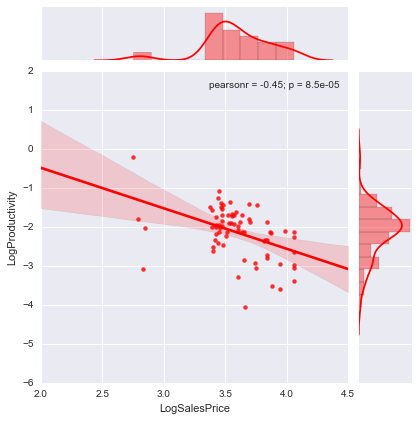

In [24]:
jointplt('753283',df_3)

In [25]:
# log-log Regression, p-value and pearson correlation control
# from scipy.stats.stats import pearsonr

# def logReg(ProductCode,df):
#     SKU = df[df.ProductCode == ProductCode]
#     x = np.log(SKU.Sales_Price)
#     y = np.log(SKU[u'销售数量']/SKU.UV)
#     pearson = pearsonr(x,y)[0]
#     #print pearson
#     slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
#     if p_value < 0.05 and abs(pearson) >= 0.5:
#         return np.round(slope,decimals=2)
#     else:
#         return np.nan

In [26]:
# log-log Regression, p-value and pearson correlation control， return all
from scipy.stats.stats import pearsonr

def logReg(ProductCode,df):
    SKU = df[df.ProductCode == ProductCode]
    x = np.log(SKU.Sales_Price)
    y = np.log(SKU[u'销售数量']/SKU.UV)
    pearson = pearsonr(x,y)[0]
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    return np.round(slope,decimals=2),pearson,p_value,r_value**2

In [27]:
# # log-log Regression, p-value and pearson correlation control, groupby adopted
# slow-performing, need optimization
# from scipy.stats.stats import pearsonr

# def logReg(ProductCode,df):
#     SKU = df[df.ProductCode == ProductCode]
#     SKU['productivity'] = np.round(SKU.Sales_Num/SKU.uv,decimals = 2)
#     temp = SKU[['Sales_Price','productivity']]
#     temp['Sales_Price'] = np.round(temp.Sales_Price,decimals = 1)
#     temp = temp.groupby('Sales_Price',as_index=False).mean()
#     x = np.log(temp.Sales_Price)
#     y = np.log(temp.productivity)
#     pearson = pearsonr(x,y)[0]
#     #print pearson
#     slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
#     if p_value < 0.05 and abs(pearson) >= 0.5:
#         return np.round(slope,decimals=2)
#     else:
#         return np.nan

In [28]:
 #suggest the price as mean of the prices that contibuted top 3 productivities in the past, currently has time complexity issue
def suggestPrice(ProductCode,df): 
    SKU = df[df.ProductCode == ProductCode]
    SKU['productivity'] = np.round(SKU[u'销售数量']/SKU.UV,decimals = 2)
    temp = SKU[['Sales_Price','productivity']]
    temp['Sales_Price'] = np.round(temp.Sales_Price,decimals = 1)
    #temp.sort(['productivity'],ascending=False)
    return temp.groupby('Sales_Price',as_index=False).mean().sort(['productivity'],ascending=False).head(3).Sales_Price.mean()

**Chanel split 199-100**

In [29]:
df1 = df_3[df_3.Mechanism == u'199-100']

In [30]:
df1.head()

,Date,ProductCode,ProductName,销售数量,Mechanism,Sales_Price,Order_Num,UV,num_per_order
515,2017-01-13,1265489,【京东超市】玉兰油 OLAY 美肌滋润沐浴乳洁净滋养 400ML（新老包装随机发货）（沐浴露）,109.0,199-100,13.93,107.0,29.0,1.018692
517,2017-01-13,1436733,【京东超市】舒肤佳沐浴露奇异果自然清香720ml（沐浴液 沐浴乳）,21.0,199-100,22.04,8.0,33.0,2.625000
518,2017-01-13,1436734,【京东超市】舒肤佳沐浴露奇异果自然清香1L（沐浴液 沐浴乳）,22.0,199-100,28.54,19.0,128.0,1.157895
520,2017-01-13,206892,【京东超市】舒肤佳沐浴露芦荟水润呵护720ml（沐浴液 沐浴乳 新老包装随机发货）,432.0,199-100,22.43,175.0,393.0,2.468571
527,2017-01-13,411169,【京东超市】舒肤佳洗手液芦荟柔肤呵护型450ml,15.0,199-100,22.37,9.0,201.0,1.666667


In [31]:
PE_1 = {}
for code in df1.ProductCode:
    PE_1[code] = logReg(code,df1)[0],logReg(code,df1)[1],logReg(code,df1)[2],logReg(code,df1)[3],suggestPrice(code,df1)

PE_DF1 =  pd.DataFrame.from_dict(PE_1, orient='index')
PE_DF1.columns =['199-100_PE','pearson','p_val','r2','suggest_price']

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:8: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [32]:
# calculate the productivity drop% when price up 10%
PE_DF1['199-100_PD10PI'] = np.round(np.exp(np.log(1.1)*PE_DF1['199-100_PE']) - 1, decimals = 2)

In [33]:
PE_DF1.dropna(inplace = True)

In [34]:
#PE_DF1.replace(np.nan,'Mark',inplace = True)

In [35]:
output = pd.merge(df1, PE_DF1, how='left',left_on=['ProductCode'],right_index = True)
output.to_excel('JD_PCC_ePOS_PE_0525.xlsx')

In [36]:
prodNames = []
for idx in PE_DF1.index:
    prodNames.append(df1[df1.ProductCode == idx].ProductName.iloc[0])
PE_DF1['productName'] = prodNames

In [37]:
PE_DF1.head()

,199-100_PE,pearson,p_val,r2,suggest_price,199-100_PD10PI,productName
845396,-0.87,-0.153053,3.271591e-01,0.023425,7.333333,-0.08,【京东超市】玉兰油香皂深度滋润（普通型）100g（新老包装，随机发送）
753297,-2.25,-0.705697,2.122741e-08,0.498008,20.766667,-0.19,【京东超市】OLAY玉兰油精油沐浴露玫瑰滋养二合一450ml（沐浴霜 沐浴乳）
845259,-3.13,-0.803680,6.139607e-12,0.645901,6.366667,-0.26,【京东超市】舒肤佳洗手液纯白清香型250ml
1436740,-4.20,-0.903309,8.861368e-18,0.815967,13.400000,-0.33,【京东超市】舒肤佳沐浴露荷叶清香健肤400ml（沐浴液 沐浴乳）
206889,-4.39,-0.747182,1.062268e-09,0.558281,21.133333,-0.34,【京东超市】舒肤佳沐浴露纯白清香型720ml（沐浴液 沐浴乳 新老包装随机发货）


In [38]:
PE_DF1.to_excel('JDPCC_PEList_0525.xlsx')